In [1]:
from keras.layers import Input, Dense,Dropout, Flatten,Lambda
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split as tts
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.utils import np_utils,plot_model
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Conv2D
from keras import backend as K
from keras.losses import categorical_hinge,categorical_crossentropy
import tensorflow as tf
#from tensorflow.layers import flatten,batch_normialization as batch_norm

Using TensorFlow backend.
/home/slcf/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## load data

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
Xtr,Xval,Ytr,Yval = tts(x_train,Y_train,test_size = 0.3)

## import defined modules

In [6]:
import sys
sys.path.append('../')
from cifar_clf import *
from cifar_dae import *

In [7]:
cifar_cnn = Cifar10_CNN(x_train,Y_train,num_batch=128,num_epoch=50)

In [9]:
print(Xtr.shape)

(35000, 32, 32, 3)


In [9]:
#len(cifar_cnn.batch_gen.get_batch())

### train classifer

In [10]:
cifar_cnn.train("cifar_CNN_clf.ckpt")

[0/5850] Loss: 2.293907 Train_Acc: 0.1016 Val_Acc: 0.0859
[500/5850] Loss: 1.014488 Train_Acc: 0.6875 Val_Acc: 0.5156
[1000/5850] Loss: 0.573174 Train_Acc: 0.8672 Val_Acc: 0.6797
[1500/5850] Loss: 0.171821 Train_Acc: 0.9766 Val_Acc: 0.7031
[2000/5850] Loss: 0.078398 Train_Acc: 1.0000 Val_Acc: 0.7266
[2500/5850] Loss: 0.029662 Train_Acc: 1.0000 Val_Acc: 0.6797
[3000/5850] Loss: 0.013135 Train_Acc: 1.0000 Val_Acc: 0.7422
[3500/5850] Loss: 0.108333 Train_Acc: 1.0000 Val_Acc: 0.7109
[4000/5850] Loss: 0.008974 Train_Acc: 1.0000 Val_Acc: 0.6562
[4500/5850] Loss: 0.133048 Train_Acc: 0.9844 Val_Acc: 0.6641
[5000/5850] Loss: 0.048985 Train_Acc: 1.0000 Val_Acc: 0.6641
[5500/5850] Loss: 0.029000 Train_Acc: 1.0000 Val_Acc: 0.7188
saved path:  ../logs/cifar_CNN_clf.ckpt


In [11]:
cifar_cnn.accuracy_score(x_test,Y_test)

0.60036057692307687

# PGD targeted attacks

In [12]:
cifar_cnn.targeted_attack(x_test,Y_test,file_name = 'cifar10_adv')

[0/10000] processed
[100/10000] processed
[200/10000] processed
[300/10000] processed
[400/10000] processed
[500/10000] processed
[600/10000] processed
[700/10000] processed
[800/10000] processed
[900/10000] processed
[1000/10000] processed
[1100/10000] processed
[1200/10000] processed
[1300/10000] processed
[1400/10000] processed
[1500/10000] processed
[1600/10000] processed
[1700/10000] processed
[1800/10000] processed
[1900/10000] processed
[2000/10000] processed
[2100/10000] processed
[2200/10000] processed
[2300/10000] processed
[2400/10000] processed
[2500/10000] processed
[2600/10000] processed
[2700/10000] processed
[2800/10000] processed
[2900/10000] processed
[3000/10000] processed
[3100/10000] processed
[3200/10000] processed
[3300/10000] processed
[3400/10000] processed
[3500/10000] processed
[3600/10000] processed
[3700/10000] processed
[3800/10000] processed
[3900/10000] processed
[4000/10000] processed
[4100/10000] processed
[4200/10000] processed
[4300/10000] processed


# Train DAE 

In [18]:
cifar_dae = Cifar_DAE(x_train,Y_train,noise_scale = 0.1)

In [19]:
cifar_dae.train_dae()

train the DAE model with noise gaussian  ( 0.1 )
Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 [==============================] - 7s 213us/step - loss: 0.5816 - val_loss: 0.6118
Epoch 2/30
35000/35000 [==============================] - 7s 207us/step - loss: 0.5683 - val_loss: 0.5658
Epoch 3/30
35000/35000 [==============================] - 7s 206us/step - loss: 0.5652 - val_loss: 0.5638
Epoch 4/30
35000/35000 [==============================] - 7s 205us/step - loss: 0.5637 - val_loss: 0.5622
Epoch 5/30
35000/35000 [==============================] - 7s 205us/step - loss: 0.5628 - val_loss: 0.5616
Epoch 6/30
35000/35000 [==============================] - 7s 205us/step - loss: 0.5622 - val_loss: 0.5610
Epoch 7/30
35000/35000 [==============================] - 7s 204us/step - loss: 0.5617 - val_loss: 0.5604
Epoch 8/30
35000/35000 [==============================] - 7s 205us/step - loss: 0.5612 - val_loss: 0.5602
Epoch 9/30
35000/35000 [=============================

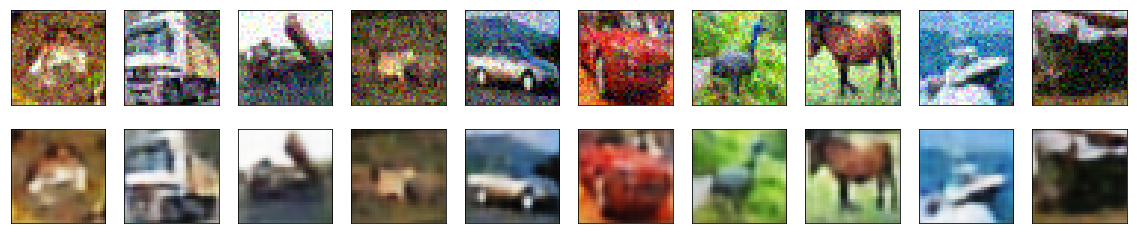

In [20]:
cifar_dae.plot_imgs(x_train,noise_type = 'gaussian',noise_scale = 0.1)